<a href="https://colab.research.google.com/github/riotrip/ml-smt5/blob/main/TG1_JS05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Pratikum**

Klasterisasi Data Nasabah Kartu Kredit

1. Buatlah scatterplot berdasarkan dataset menggunakan dua variabel, yaitu avg_Credit_Limit dan Total_credit_card. Apakah sebaran data dapat dikatakan linier?
2. Buatlah model klasterisasi dengan menggunakan model K-Means. Tentukan jumlah k yang terbaik dengan menggunakan elbow method. Lengkapi analisis Anda dengan linechart dan hasil analisis mengapa Anda memilih nilai tersebut.
3. Gambarkan hasil klasterisasi dengan model K-Means dengan menggunakan scatterplot.
4. Buatlah model klasterisasi dengan menggunakan DBSCAN dengan seluruh variabel yang dapat digunakan.
5. Tentukan jumlah k k yang terbaik dengan menggunakan elbow method. Lengkapi analisis Anda dengan linechart dan hasil analisis mengapa Anda memilih nilai tersebut.
6. Tentukan nilai silhouette score dan DBI dari model DBSCAN.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors

In [52]:
df = pd.read_csv('/content/drive/MyDrive/PembelajaranMesin_Rio/docs/CC_Customer_Dataset.csv')
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [54]:
X = df[['Avg_Credit_Limit', 'Total_Credit_Cards']]
X.head()

,Avg_Credit_Limit,Total_Credit_Cards
0,100000,2
1,50000,3
2,50000,7
3,30000,5
4,100000,6


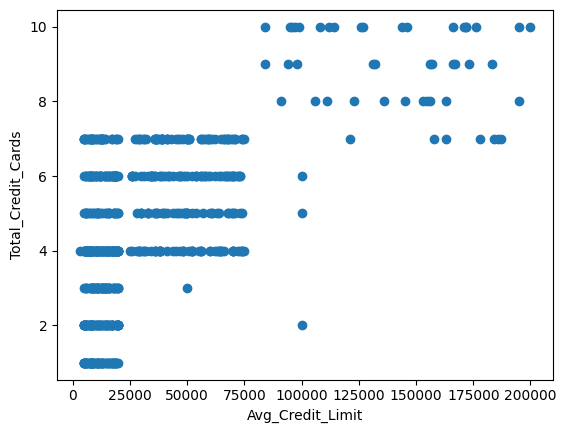

In [55]:
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')
plt.scatter(X['Avg_Credit_Limit'], X['Total_Credit_Cards'])
plt.show()

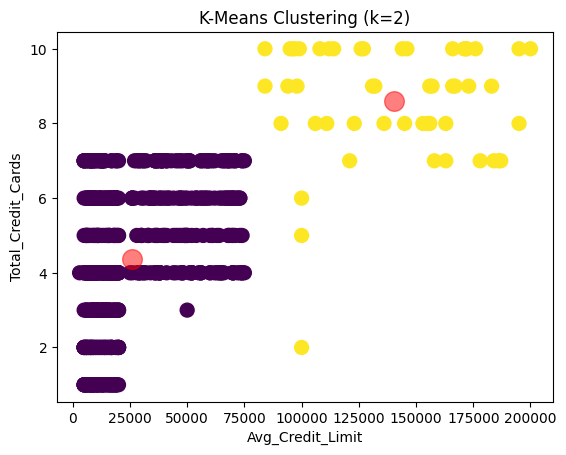

In [56]:
cl_kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
y_kmeans = cl_kmeans.fit_predict(X)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')
plt.title('K-Means Clustering (k=2)')
plt.show()

In [57]:
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 315872383980.64026


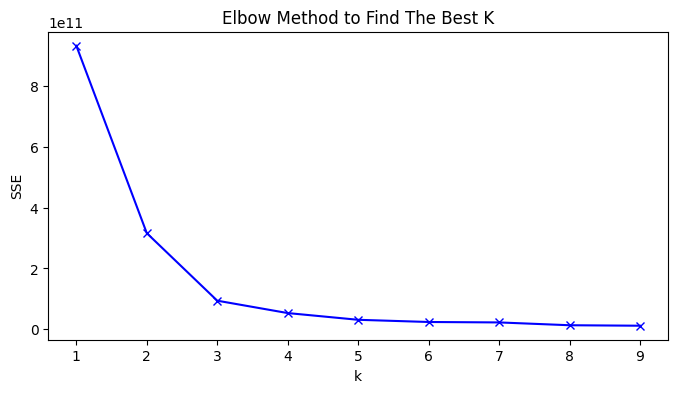

In [58]:
sse = []

K = range(1,10)

for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method to Find The Best K")
plt.show()

In [59]:
for k, sse_val in zip(K, sse):
    print(f'k = {k}, SSE = {sse_val:.2f}')

k = 1, SSE = 932931365218.19
k = 2, SSE = 316058949431.97
k = 3, SSE = 93805173382.07
k = 4, SSE = 53044221929.51
k = 5, SSE = 30908855876.48
k = 6, SSE = 23676885595.56
k = 7, SSE = 22240004382.50
k = 8, SSE = 12988129235.00
k = 9, SSE = 11394389175.93


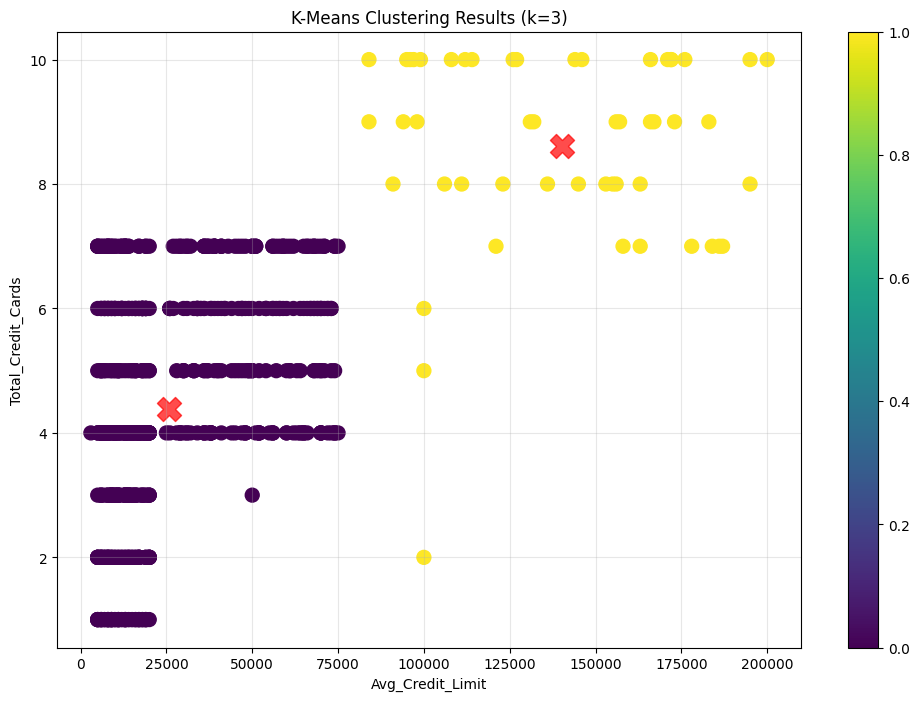


Karakteristik Setiap Klaster:
         Avg_Credit_Limit  Total_Credit_Cards
Cluster                                      
0            25725.779967            4.379310
1           140235.294118            8.607843


In [60]:
cl_kmeans_best = KMeans(n_clusters=2, random_state=0, n_init=10)
y_kmeans_best = cl_kmeans_best.fit_predict(X)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=100, c=y_kmeans_best, cmap='viridis')
centers = cl_kmeans_best.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.7, marker='X')
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')
plt.title('K-Means Clustering Results (k=3)')
plt.colorbar(scatter)
plt.grid(True, alpha=0.3)
plt.show()

df['Cluster'] = y_kmeans_best
cluster_summary = df.groupby('Cluster')[['Avg_Credit_Limit', 'Total_Credit_Cards']].mean()
print("\nKarakteristik Setiap Klaster:")
print(cluster_summary)

In [61]:
X_all = df[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_all)

print("Data setelah standardisasi:")
print(pd.DataFrame(X_scaled, columns=X_all.columns).head())
print(f"Dimensi data: {X_scaled.shape}")

Data setelah standardisasi:
   Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0          1.740187           -1.249225          -0.860451   
1          0.410293           -0.787585          -1.473731   
2          0.410293            1.058973          -0.860451   
3         -0.121665            0.135694          -0.860451   
4          1.740187            0.597334          -1.473731   

   Total_visits_online  Total_calls_made  
0            -0.547490         -1.251537  
1             2.520519          1.891859  
2             0.134290          0.145528  
3            -0.547490          0.145528  
4             3.202298         -0.203739  
Dimensi data: (660, 5)


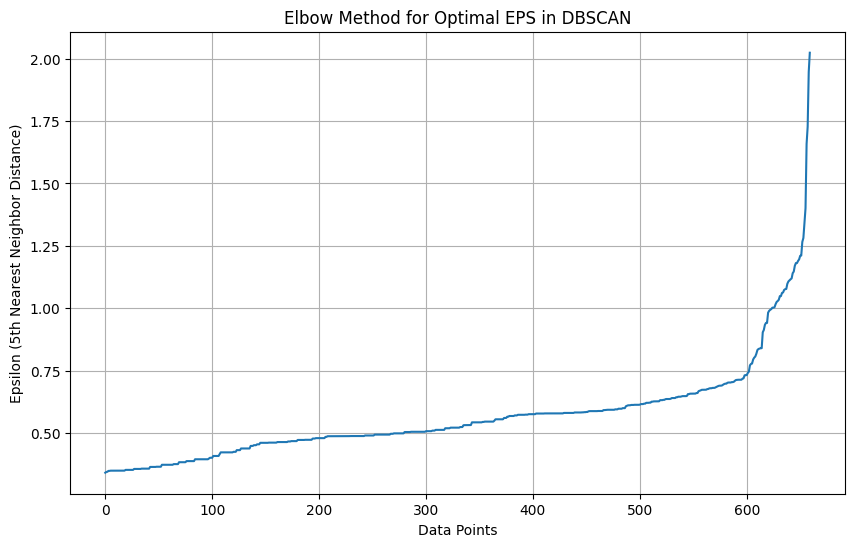

Titik siku (elbow point) berada pada index: 656
Nilai EPS optimal: 1.658


In [62]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, 4], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel('Epsilon (5th Nearest Neighbor Distance)')
plt.title('Elbow Method for Optimal EPS in DBSCAN')
plt.grid(True)
plt.show()

diff = np.diff(distances)
diff2 = np.diff(diff)
elbow_point = np.argmax(diff2) + 2

optimal_eps = distances[elbow_point]
print(f"Titik siku (elbow point) berada pada index: {elbow_point}")
print(f"Nilai EPS optimal: {optimal_eps:.3f}")

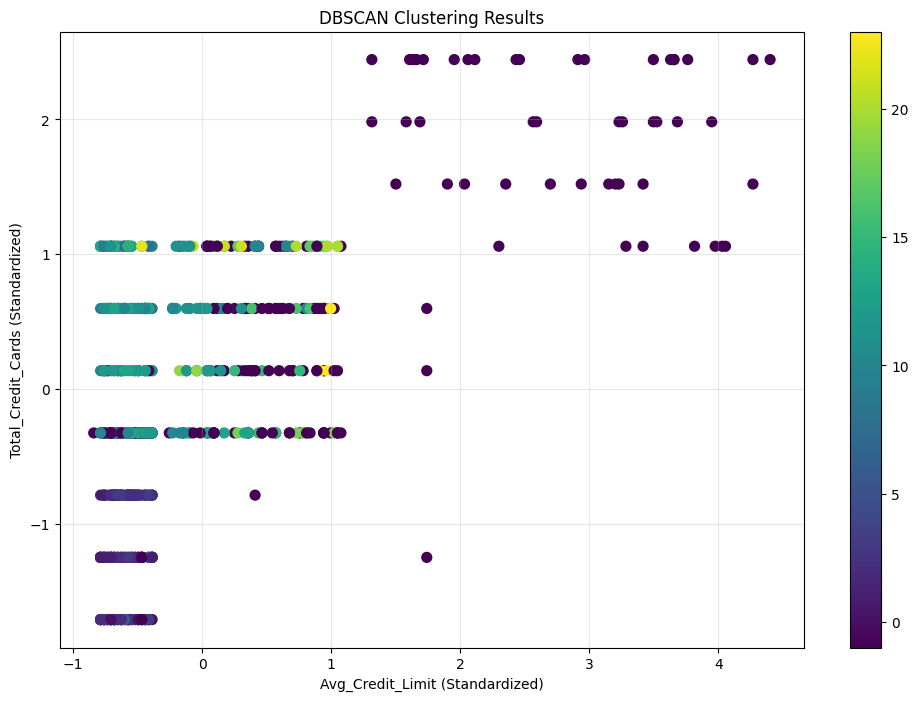

Jumlah klaster yang terbentuk: 24
Jumlah noise points: 205
Persentase noise: 31.06%
Klaster yang terbentuk: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23]


In [63]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_db = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_db, s=50, cmap='viridis')
plt.xlabel('Avg_Credit_Limit (Standardized)')
plt.ylabel('Total_Credit_Cards (Standardized)')
plt.title('DBSCAN Clustering Results')
plt.colorbar(scatter)
plt.grid(True, alpha=0.3)
plt.show()

unique_clusters = np.unique(cluster_db)
n_clusters = len(unique_clusters) - (1 if -1 in unique_clusters else 0)
n_noise = list(cluster_db).count(-1)

print(f"Jumlah klaster yang terbentuk: {n_clusters}")
print(f"Jumlah noise points: {n_noise}")
print(f"Persentase noise: {(n_noise/len(cluster_db))*100:.2f}%")
print(f"Klaster yang terbentuk: {unique_clusters}")

In [64]:
valid_points = cluster_db != -1
X_valid = X_scaled[valid_points]
cluster_valid = cluster_db[valid_points]

if len(np.unique(cluster_valid)) > 1:
    silhouette_avg = silhouette_score(X_valid, cluster_valid)
    print(f"Silhouette Score: {silhouette_avg:.3f}")

    dbi = davies_bouldin_score(X_valid, cluster_valid)
    print(f"Davies-Bouldin Index: {dbi:.3f}")
else:
    print("Tidak dapat menghitung metrik: hanya terbentuk 1 klaster atau kurang")

Silhouette Score: 0.027
Davies-Bouldin Index: 1.433


In [65]:
param_combinations = [
    {'eps': 0.3, 'min_samples': 5},
    {'eps': 0.5, 'min_samples': 5},
    {'eps': 0.7, 'min_samples': 5},
    {'eps': 0.5, 'min_samples': 10}
]

results = []

for params in param_combinations:
    dbscan_temp = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    clusters_temp = dbscan_temp.fit_predict(X_scaled)

    valid_mask = clusters_temp != -1
    X_valid_temp = X_scaled[valid_mask]
    clusters_valid_temp = clusters_temp[valid_mask]

    n_clusters_temp = len(np.unique(clusters_valid_temp))

    if n_clusters_temp > 1:
        silhouette = silhouette_score(X_valid_temp, clusters_valid_temp)
        dbi_score = davies_bouldin_score(X_valid_temp, clusters_valid_temp)
    else:
        silhouette = -1
        dbi_score = float('inf')

    n_noise_temp = list(clusters_temp).count(-1)

    results.append({
        'eps': params['eps'],
        'min_samples': params['min_samples'],
        'n_clusters': n_clusters_temp,
        'n_noise': n_noise_temp,
        'silhouette': silhouette,
        'dbi': dbi_score
    })

results_df = pd.DataFrame(results)
print("\nPerbandingan Hasil DBSCAN dengan Berbagai Parameter:")
print(results_df)


Perbandingan Hasil DBSCAN dengan Berbagai Parameter:
   eps  min_samples  n_clusters  n_noise  silhouette       dbi
0  0.3            5           0      660   -1.000000       inf
1  0.5            5          24      205    0.026999  1.433492
2  0.7            5           1       58   -1.000000       inf
3  0.5           10           6      566    0.388753  0.965026



Parameter terbaik berdasarkan Silhouette Score:
EPS: 0.5, Min Samples: 10.0
Silhouette Score: 0.389
Davies-Bouldin Index: 0.965


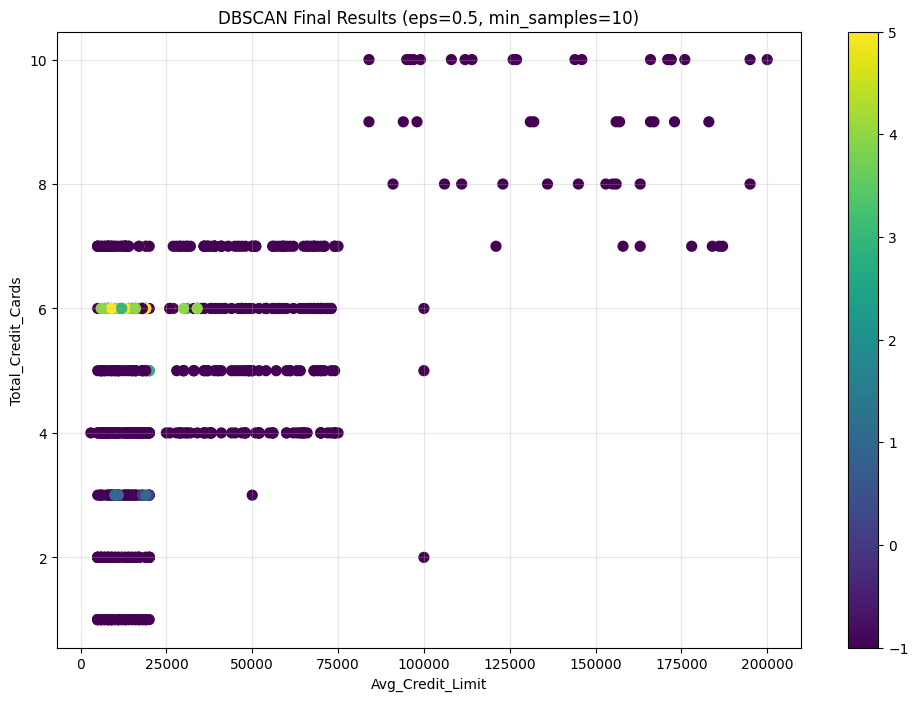


Karakteristik Klaster DBSCAN:
                Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
DBSCAN_Cluster                                                            
-1                  37885.159011            4.749117           2.420495   
 0                  14812.500000            2.125000           0.000000   
 1                  12380.952381            2.904762           1.000000   
 2                  14700.000000            4.000000           1.000000   
 3                  14764.705882            5.882353           5.000000   
 4                  16050.000000            6.150000           3.000000   
 5                  16000.000000            6.000000           4.000000   

                Total_visits_online  Total_calls_made  
DBSCAN_Cluster                                         
-1                         2.598940          3.579505  
 0                         3.750000          4.750000  
 1                         4.333333          5.428571  
 2           

In [67]:
best_result = results_df.loc[results_df['silhouette'].idxmax()]
print(f"\nParameter terbaik berdasarkan Silhouette Score:")
print(f"EPS: {best_result['eps']}, Min Samples: {best_result['min_samples']}")
print(f"Silhouette Score: {best_result['silhouette']:.3f}")
print(f"Davies-Bouldin Index: {best_result['dbi']:.3f}")

dbscan_final = DBSCAN(eps=best_result['eps'], min_samples=int(best_result['min_samples']))
cluster_final = dbscan_final.fit_predict(X_scaled)

plt.figure(figsize=(12, 8))
scatter_final = plt.scatter(X_all.iloc[:, 0], X_all.iloc[:, 1], c=cluster_final, s=50, cmap='viridis')
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')
plt.title(f'DBSCAN Final Results (eps={best_result["eps"]}, min_samples={int(best_result["min_samples"])})')
plt.colorbar(scatter_final)
plt.grid(True, alpha=0.3)
plt.show()

df['DBSCAN_Cluster'] = cluster_final
cluster_analysis = df.groupby('DBSCAN_Cluster')[['Avg_Credit_Limit', 'Total_Credit_Cards',
                                               'Total_visits_bank', 'Total_visits_online',
                                               'Total_calls_made']].mean()
print("\nKarakteristik Klaster DBSCAN:")
print(cluster_analysis)